<a href="https://colab.research.google.com/github/Kiransardarahmad19/signhope_signlanguageapp/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#path of dataset from drive to colab

dataset_folder_path = '/content/drive/My Drive/Fyp_dataset/mnist/'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Define the dataset folder path
dataset_folder_path = '/content/drive/My Drive/Fyp_dataset/mnist/'

# Update the file paths to include the dataset folder path
train_df = pd.read_csv('/content/drive/My Drive/Fyp_dataset/mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Fyp_dataset/mnist/sign_mnist_test/sign_mnist_test.csv')

y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [6]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


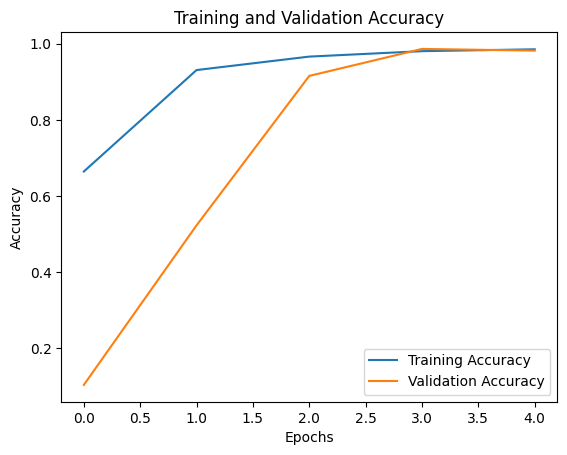

In [7]:
import matplotlib.pyplot as plt

# Model compilation, summary, and training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=5, validation_data=(x_test, y_test))

# Saving the trained model to Google Drive
model.save('/content/drive/My Drive/Fyp_dataset/mnist/smnist.h5')

# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

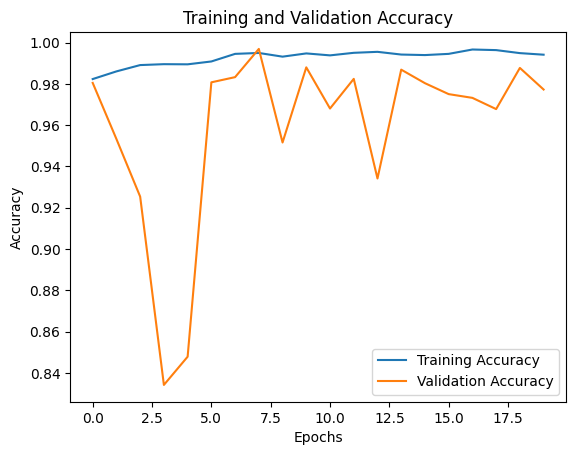

In [8]:
import matplotlib.pyplot as plt

# Model compilation, summary, and training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test))

# Saving the trained model to Google Drive
model.save('/content/drive/My Drive/Fyp_dataset/mnist/smnist.h5')

# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
model.save('/content/drive/My Drive/Fyp_dataset/mnist/smnist.h5')

In [11]:
pip install mediapipe

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time

In [13]:
model = load_model('smnist.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
_, frame = cap.read()
h, w, c = frame.shape

analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


AttributeError: ignored

In [ ]:
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
    cv2.imshow("Frame", frame)

cap.release()
cv2.destroyAllWindows()

In [2]:
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        # SPACE pressed
        analysisframe = frame
        showframe = analysisframe
        cv2.imshow("Frame", showframe)
        framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
        resultanalysis = hands.process(framergbanalysis)
        hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
        if hand_landmarksanalysis:
            for handLMsanalysis in hand_landmarksanalysis:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lmanalysis in handLMsanalysis.landmark:
                    x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20

        analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
        analysisframe = analysisframe[y_min:y_max, x_min:x_max]
        analysisframe = cv2.resize(analysisframe,(28,28))


        nlist = []
        rows,cols = analysisframe.shape
        for i in range(rows):
            for j in range(cols):
                k = analysisframe[i,j]
                nlist.append(k)

        datan = pd.DataFrame(nlist).T
        colname = []
        for val in range(784):
            colname.append(val)
        datan.columns = colname

        pixeldata = datan.values
        pixeldata = pixeldata / 255
        pixeldata = pixeldata.reshape(-1,28,28,1)

NameError: ignored

In [ ]:
prediction = model.predict(pixeldata)
predarray = np.array(prediction[0])
letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
predarrayordered = sorted(predarray, reverse=True)
high1 = predarrayordered[0]
high2 = predarrayordered[1]
high3 = predarrayordered[2]
for key,value in letter_prediction_dict.items():
    if value==high1:
        print("Predicted Character 1: ", key)
        print('Confidence 1: ', 100*value)
    elif value==high2:
        print("Predicted Character 2: ", key)
        print('Confidence 2: ', 100*value)
    elif value==high3:
        print("Predicted Character 3: ", key)
        print('Confidence 3: ', 100*value)
time.sleep(5)